Ссылка на вторую часть исследований - https://github.com/foreg/emg

In [ ]:
import numpy as np
import pandas as pd
import glob
import os

from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, plot_confusion_matrix
from collections import Counter
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
all_files = glob.glob(os.path.join('/content/drive/MyDrive/datasets/0[123]', "*.txt"))
all_files

['/content/drive/MyDrive/datasets/03/1_raw_data_09-32_11.04.16.txt',
 '/content/drive/MyDrive/datasets/03/2_raw_data_09-34_11.04.16.txt',
 '/content/drive/MyDrive/datasets/02/1_raw_data_14-19_22.03.16.txt',
 '/content/drive/MyDrive/datasets/02/2_raw_data_14-21_22.03.16.txt',
 '/content/drive/MyDrive/datasets/01/2_raw_data_13-13_22.03.16.txt',
 '/content/drive/MyDrive/datasets/01/1_raw_data_13-12_22.03.16.txt']

In [ ]:
def get_dataset():
	all_files = glob.glob(os.path.join('/content/drive/MyDrive/datasets/*', "*.txt"))

	data = pd.concat((pd.read_csv(f, sep='\t') for f in all_files))
	not_zero_class = (data['class'] != 0) #& (data['class'] != 6)
	data = data[not_zero_class]
	indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
	data = data[indices_to_keep].astype(np.float64)
	# data = data.fillna(data.mean())

	X = np.array([data.channel1, data.channel2, data.channel3, data.channel4, data.channel5, data.channel6, data.channel7, data.channel8]).T
	y = np.array(data['class']).T
	print(np.unique(y))
	return X, y

In [ ]:
def get_models():
	models = dict()
	for p in [0.1]:#, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % p
		models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models

In [ ]:

def evaluate_model(model, X_train, y_train, X_test, y_test):
	# model = model.fit(X_train, y_train)
	# model = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
	# model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
	model = dtree_model = DecisionTreeClassifier(max_depth = 64).fit(X_train, y_train)
	y_pred = model.predict(X_test)
	
	accuracy = model.score(X_test, y_test) 
	print(accuracy)
	conf_mat = confusion_matrix(y_test, y_pred)
	print(conf_mat)
	plot_confusion_matrix(model, X_test, y_test, normalize='true')  

[1. 2. 3. 4. 5. 6. 7.]
Class=1, n=250055 (16.530%)
Class=2, n=243193 (16.076%)
Class=3, n=249494 (16.493%)
Class=4, n=251570 (16.630%)
Class=5, n=251733 (16.641%)
Class=6, n=253009 (16.725%)
Class=7, n=13696 (0.905%)


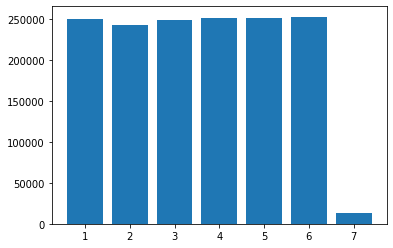

[[ 2.0e-05  0.0e+00 -3.0e-05 ...  2.0e-05  4.0e-05 -2.0e-05]
 [ 2.0e-05  0.0e+00 -3.0e-05 ...  2.0e-05  4.0e-05 -2.0e-05]
 [ 2.0e-05  0.0e+00 -3.0e-05 ...  2.0e-05  4.0e-05 -2.0e-05]
 ...
 [-2.7e-04 -6.0e-05  3.0e-05 ...  1.5e-04 -7.0e-05 -1.0e-04]
 [-2.7e-04 -6.0e-05  3.0e-05 ...  1.5e-04 -7.0e-05 -1.0e-04]
 [-2.7e-04 -6.0e-05  3.0e-05 ...  1.5e-04 -7.0e-05 -1.0e-04]]
[[ 1.0e-04  3.0e-05  2.0e-05 ... -9.0e-05  3.7e-04  5.9e-04]
 [-9.0e-05  9.0e-05  5.0e-05 ...  3.0e-05 -4.0e-05 -2.4e-04]
 [ 1.0e-05  1.3e-04  1.3e-04 ...  8.0e-05  9.0e-05  4.0e-05]
 ...
 [ 3.0e-05 -1.2e-04 -1.7e-04 ... -8.0e-05 -3.0e-05  2.0e-05]
 [-2.0e-04 -4.0e-05  0.0e+00 ... -5.0e-05 -3.0e-05 -3.0e-05]
 [ 1.0e-05  2.0e-05 -4.0e-05 ...  5.0e-05  0.0e+00  1.0e-05]]


In [ ]:
X, y = get_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
print(X)
print(X_train)

[0. 1. 2. 3. 4. 5. 6. 7.]  
Class=0, n=2725157 (64.304%)  
Class=1, n=250055 (5.900%)  
Class=2, n=243193 (5.739%)  
Class=3, n=249494 (5.887%)  
Class=4, n=251570 (5.936%)  
Class=5, n=251733 (5.940%)  
Class=6, n=253009 (5.970%)  
Class=7, n=13696 (0.323%)  
Total = 4237907  
[1. 2. 3. 4. 5. 6. 7.]  
Class=1, n=250055 (16.530%)  
Class=2, n=243193 (16.076%)  
Class=3, n=249494 (16.493%)  
Class=4, n=251570 (16.630%)  
Class=5, n=251733 (16.641%)  
Class=6, n=253009 (16.725%)  
Class=7, n=13696 (0.905%)  

0.9812394893545009
[[62132    45    92    56    99    46     2]
 [   51 59485   392   243   309   360    18]
 [   83   331 61209    83   214   495    25]
 [   60   222    96 61352   560   251    22]
 [  147   277   196   555 61549   193    12]
 [   43   392   504   281   169 62043    62]
 [    0    25    23    12    15    34  3323]]


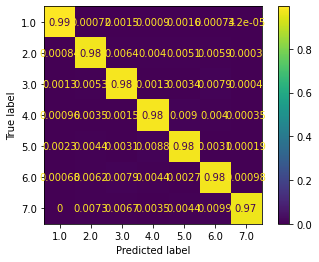

In [ ]:
models = get_models()

results, names = list(), list()
for name, model in models.items():
	# scores = evaluate_model(model, X, y)
	evaluate_model(model, X_train, y_train, X_test, y_test)

	# results.append(scores)
	# names.append(name)

	# print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

0.966902704475023  
[[62042    32    97    66   189    43     3]  
 [  130 58244   675   456   552   762    39]  
 [  248   551 60048   173   414   959    47]  
 [  127   330   114 60522  1020   428    22]  
 [  317   369   387  1109 60499   227    21]  
 [  129   529   853   556   265 61093    69]  
 [   10    24    31    27    25    92  3223]]  